# Block 5 Exercise 1: Classification

## MNIST Data
In these exercises we are using the MNIST data set on handwritten digits to compare supervised classification algorithms...   

In [1]:
#imports 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml

In [2]:
# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)


In [3]:
#the full MNIST data set contains 70k samples of digits 0-9 as 28*28 gray scale images (represented as 784 dim vectors)
np.shape(X)

(70000, 784)

In [4]:
np.shape(y)

(70000,)

### E1.1: Use SkLearn methods to split the

 MNIST data into random train and test sets. Use 60k samples for training.  

In [5]:
import sklearn.model_selection

In [6]:
 X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, train_size=6/7)

### E1.2: Visualize the data.
* Plot some data samples as images (use https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.imshow.html)

In [7]:
np.shape(X_train)

(60000, 784)

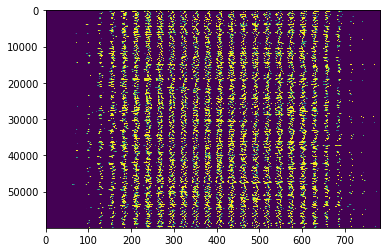

In [8]:
plt.imshow(X_train,interpolation='nearest', aspect='auto' )

### E1.3: Train models on the train data.
Train the following models with default parameters on the train data.
* [Naive Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB) (assuming a Gaussian distribution of the data)
* [Simple linear model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier)
   * use ``loss='log'`` to reproduce our logistic loss function 
* [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier)

Compare the training accuracy (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) and [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix) for all three models.

In [9]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier

training accuracy Naive Bayes 0.5604


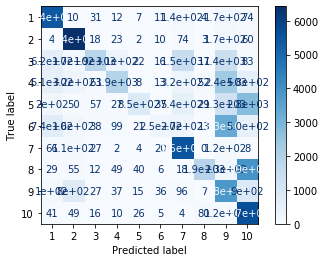

In [10]:
clf_NB = GaussianNB()
clf_NB.fit(X_train,y_train)
print('training accuracy','Naive Bayes', accuracy_score(y_train, clf_NB.predict(X_train)))

#confusion_matrixBayes = confusion_matrix(y_train, clf.predict(X_train))

plot_confusion_matrix(clf_NB, X_train, y_train,
                                 display_labels= range(1,11),
                                 cmap=plt.cm.Blues)

training accuracy Simple linear model 0.8959833333333334


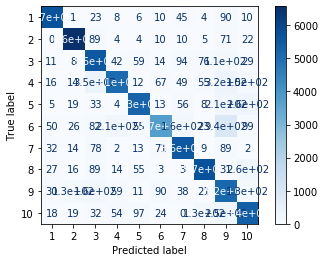

In [11]:
clf_slm = SGDClassifier(loss='log', n_jobs=4)
clf_slm.fit(X_train,y_train)
print('training accuracy','Simple linear model', accuracy_score(y_train, clf_slm.predict(X_train)))

#confusion_matrixBayes = confusion_matrix(y_train, clf.predict(X_train))

plot_confusion_matrix(clf_slm, X_train, y_train,
                                 display_labels= range(1,11),
                                 cmap=plt.cm.Blues)

training accuracy Random Forest 1.0


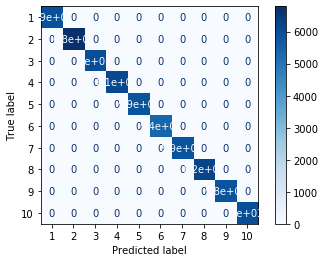

In [193]:
clf_rfc = RandomForestClassifier(n_jobs=4)
clf_rfc.fit(X_train,y_train)
print('training accuracy','Random Forest', accuracy_score(y_train, clf_rfc.predict(X_train)))

#confusion_matrixBayes = confusion_matrix(y_train, clf.predict(X_train))

plot_confusion_matrix(clf_rfc, X_train, y_train,
                                 display_labels= range(1,11),
                                 cmap=plt.cm.Blues)

### E1.4: Evaluate and compare the models on the test set.
* compute the test [accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) 
* compute the [F-Measure](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score)
* plot a [ROC curves](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve) for the class "5" for all three models.
                          

In [194]:
predict_NB = clf_NB.predict(X_test)
predict_slm = clf_slm.predict(X_test)
predict_rfc = clf_rfc.predict(X_test)

In [195]:
print('test accuracy', 'Naive Bayes', accuracy_score(y_test,predict_NB))
print('test accuracy', 'Simple linear model', accuracy_score(y_test,predict_slm))
print('test accuracy', 'Random Forest', accuracy_score(y_test,predict_rfc))

test accuracy Naive Bayes 0.5605
test accuracy Simple linear model 0.8833
test accuracy Random Forest 0.9707


In [196]:
from sklearn.metrics import f1_score

In [197]:
print('test F-Measure', 'Naive Bayes', f1_score(y_test,predict_NB, average='macro'))
print('test F-Measure', 'Simple linear model', f1_score(y_test,predict_slm, average='macro'))
print('test F-Measure', 'Random Forest', f1_score(y_test,predict_rfc, average='macro'))

test F-Measure Naive Bayes 0.5093512530230802
test F-Measure Simple linear model 0.8818393797257802
test F-Measure Random Forest 0.9704654768659013


In [198]:
from sklearn.metrics import roc_curve

In [199]:
predict_score_NB = clf_NB.predict_proba(X_test)[:,5]
predict_score_slm = np.nan_to_num(clf_slm.predict_proba(X_test))[:,5]
predict_score_rfc = clf_rfc.predict_proba(X_test)[:,5]

C:\Users\Fabio\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:313: RuntimeWarning: invalid value encountered in true_divide
  prob /= prob.sum(axis=1).reshape((prob.shape[0], -1))


In [200]:
y_test_int = y_test.astype(int)

fpr_NB, tpr_NB, thresholds_NB = roc_curve(y_test_int,predict_score_NB, pos_label=5)
fpr_slm, tpr_slm, thresholds_slm = roc_curve(y_test_int,predict_score_slm, pos_label=5)
fpr_rfc, tpr_rfc, thresholds_rfc = roc_curve(y_test_int,predict_score_rfc, pos_label=5)

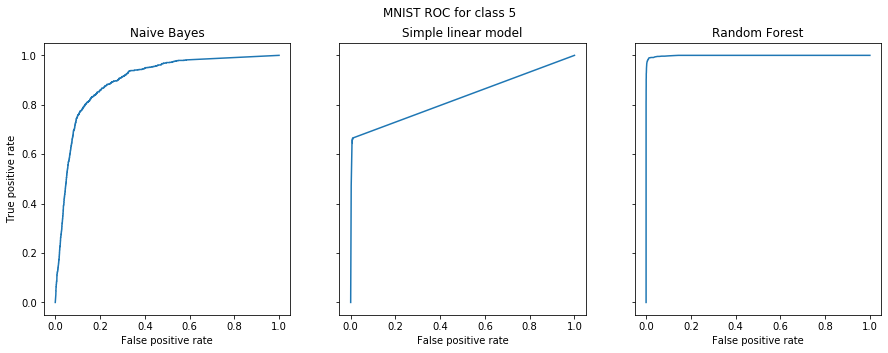

In [201]:
fig, axes = plt.subplots(1, 3,figsize=(15,5))
fig.suptitle('MNIST ROC for class 5')

axes[0].plot(fpr_NB, tpr_NB)
axes[0].set_title('Naive Bayes')

axes[1].plot(fpr_slm, tpr_slm)
axes[1].set_title('Simple linear model')

axes[2].plot(fpr_rfc, tpr_rfc)
axes[2].set_title('Random Forest')

for ax in axes.flat:
    ax.set(xlabel='False positive rate', ylabel='True positive rate')
    
for ax in axes.flat:
    ax.label_outer()